### Summary

The following notebook demonstrates how to use NeuronUnit tests to obtain membrane property values of a simple NEURON cell. The test results are compared to data found in NeuroElectro.org database

### Import required packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as g

from neuronunit.neuron.models import *
from neuronunit.tests import *
import neuronunit.neuroelectro
from quantities import nA, pA, s, ms, mV

from neuron import h

# DEBUG TESTING
#from importlib import *
#import neuronunit
#reload(neuronunit.neuron.models)
#from neuronunit.neuron.models import *

### Create a simple HH cell in NEURON

In [31]:
soma = h.Section()
soma.L = 100
soma.diam = 100
soma.cm = 10
soma.Ra = 180
soma.insert("pas")
soma.insert("hh")

### Create a NeuronUnit model using the cell

In [32]:
mod1 = SingleCellModel(hVar = h, \
                       section = soma, \
                       loc = 0.5, # Current and voltage injection and measurement location on the section \
                       name = "SimpleHHCellModel")

mod1.setIntegrationMethod("fixed")  # Or "variable"
mod1.setTimeStep(1/128.0 * ms) # 2^-n are preferable
#mod1.setTolerance(0.01) # Only needed if "variable"
mod1.setStopTime(2*s)

### Find desired stimulation current

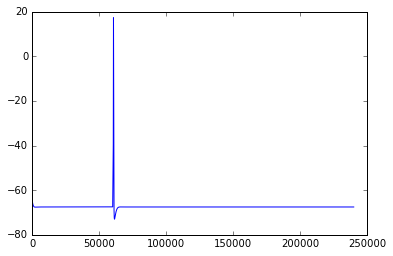

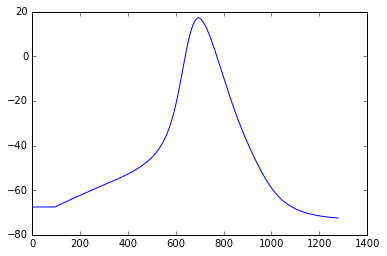

<function __main__.inject>

In [33]:
from ipywidgets import interact

def inject(i):
    mod1.inject_square_current({'amplitude': float(i)*nA, 'delay': .5*s, 'duration': 5*ms})

    g.plot(mod1.get_membrane_potential())
    g.show()
    g.plot(mod1.get_APs()[0])
    g.show()
    
interact(inject,i="20")

### Set the test currents

In [17]:
i_tau = {'amplitude': -1*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  = {'amplitude': 20*nA, 'delay': 1*s, 'duration': 5*ms}

### Create a suite of example tests with expected observations

In [34]:
t1 = neuronunit.tests.InjectedCurrentAPWidthTest({ 'mean': 1.5*ms, 'std': 0.5*ms }) # Example values
t1.params = {'injected_square_current': i_ap }

t2 = neuronunit.tests.RestingPotentialTest({ 'mean': -67*mV, 'std': 5*mV })

suite = sciunit.TestSuite("SimpleTestSuite",[t1,t2])

### Evaluate the model with the test suite

In [35]:
score = suite.judge(mod1)
score.view()

A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation


,Injected current AP width,Resting potential
SimpleHHCellModel,Z = 1.02,Z = -0.11


### Define tests that will use NeuroElectro.org Data

In [37]:
# Load previously saved data
import pickle

# These are saved in ExperimentalObservations notebook
with open("observations.dat", "rb") as file: 
    observations = pickle.load(file)
    
# Define the tests to perform on the cell
testTypes = [ \
    [InputResistanceTest,            None],
    [RestingPotentialTest,           None],
    [TimeConstantTest,               {'injected_square_current': i_tau }],
    [InjectedCurrentAPWidthTest,     {'injected_square_current': i_ap }], \
    [InjectedCurrentAPThresholdTest, {'injected_square_current': i_ap }], \
    [InjectedCurrentAPAmplitudeTest, {'injected_square_current': i_ap }],
]

tests = []

# Fetch NeuroElectro property values for each test
for t in xrange(len(testTypes)):
    testType = testTypes[t][0]
    params = testTypes[t][1]
    
    # Create a test instance using the observations
    test = testType(observations["Pooled"][testType.name])
    
    if(params is not None):
        test.params = params
    
    tests.append(test)
    
# Create a test suite    
suite = sciunit.TestSuite("Membrane Property Tests", tests)

### Evaluate the model

In [38]:
score = suite.judge(mod1)
score.view()

A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A fl

,Input resistance,Resting potential,Time constant,Injected current AP width,Injected current AP threshold,Injected current AP amplitude
SimpleHHCellModel,Z = -0.72,Z = -0.38,Z = -1.35,Z = 0.51,Z = -0.31,Z = 0.01
